<a href="https://colab.research.google.com/github/Aishwarya-hikare/Netflix-movies-and-tv-shows-clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⬛ Project Name : Netflix Movies And TV Shows Clustering**
## **▶ Project Type - Unsupervised Learning**
## **▶ Contribution - Team**
## **◼ Team Member 1 - Aishwarya Hikare**
## **◼ Team Member 2 - Sumit Kumar Mahato**

# **⬛ GitHub Link**

### **◼ Team Member 1 - Aishwarya Hikare**
### **▶ Link :**https://github.com/Aishwarya-hikare/Netflix-movies-and-tv-shows-clustering
### **◼ Team Member 2 - Sumit Kumar Mahato**
### **▶ Link :**https://github.com/sumit25chini/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING

# ⬛ **Problem Statement**

### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

### In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

### Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## ▶ **Data Description**


## **Attribute Information:**

### ◼  **Show_id** : Unique ID for every Movie / Tv Show

### ◼ **Type** : Identifier - A Movie or TV Show

### ◼ **Title** : Title of the Movie / Tv Show

### ◼  **Director** : Director of the Show

### ◼  **Cast**: Actors involved in the movie / show

### ◼ **Country** : Country where the movie / show was produced

### ◼ **Date_added** : Date it was added on Netflix

### ◼ **Release_year** : Actual Release year of the movie / show

### ◼ **Rating** : TV Rating of the movie / show

### ◼  **Duration** : Total Duration - in minutes or number of seasons

### ◼ **Listed_in** : Genere

### ◼  **Description** : The Summary description


# ⬛ **Import Libraries**

In [86]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer



# ⬛ **Loading Dataset**

In [87]:
# Let's Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# Let's load the Data
Netflix_dataset=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# ▶ **Understand More About The Dataset**

In [89]:
# Lets's see  whole the Data
Netflix_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [90]:
# Check the top  rows to take a glimps of the dataset
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [91]:
# Let's check the last rows of dataset
Netflix_dataset.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [92]:
# Check The Total Rows And Columns In The Dataset.
print('No. of rows :',Netflix_dataset.shape[0])
print('No. of Columns :',Netflix_dataset.shape[1])

No. of rows : 7787
No. of Columns : 12


In [93]:
# The INFO() Method Get Information About The Data.
Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


◼ The Data includes only one numerical type of data and the rest is all categorical data.

◼ The Data has 7877 rows and 12 columns.

In [94]:
# Check The Column of the Dataset.
Netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# ⬛ **Data** **Cleaning**

### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

## **▶   Null Values**

In [95]:
# Check The Null Values In Our Data.
Netflix_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

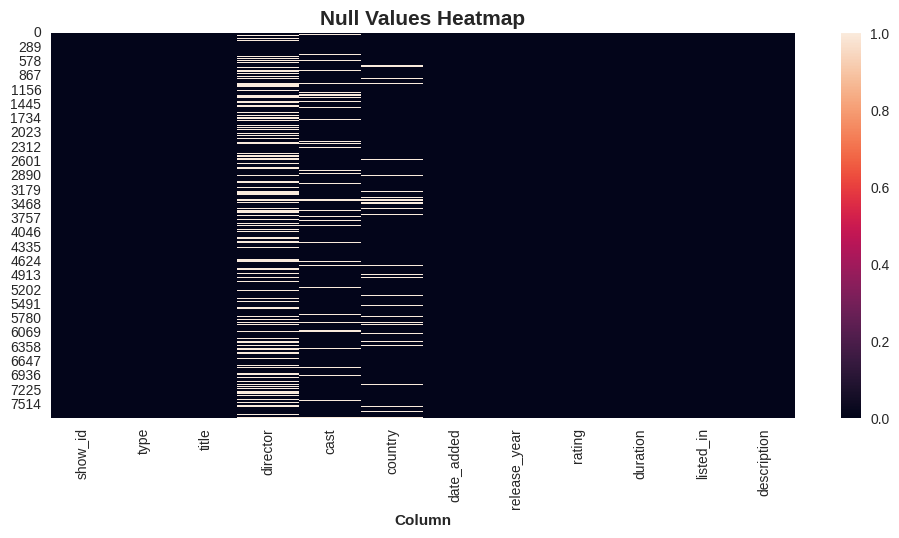

In [96]:
# Using a Heatmap To Show Null Values Count
plt.figure(figsize=(12, 5))
sns.heatmap(Netflix_dataset.isnull())
plt.title('Null Values Heatmap',fontweight="bold",size=15)
plt.xlabel('Column',fontweight="bold")
plt.show()

In [97]:
# Check The Percentage of column With Null Values
for col in Netflix_dataset.columns:
  null_rate = Netflix_dataset[col].isnull().sum() / len(Netflix_dataset) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [98]:
# Total Null Values
Netflix_dataset.isnull().sum().sum()

3631

### ◼ There are 3631 null values in the dataset, 2389 null values in the director column, 718 null values in the cast column, 507 null values in the country column, 10 in date_added, and 7 in rating, so we need to handle the null values.

In [99]:
# Treatment of Null Values
Netflix_dataset['director'].fillna('No Director', inplace=True)
Netflix_dataset['cast'].fillna('No Cast', inplace=True)
Netflix_dataset['country'].fillna('Country Unavailable', inplace=True)

### ◼ For the Director column, we filled in null values as 'No director', and for the Cast column, we filled in 'No cast' and country as 'country unavailabile'.

In [100]:
# After Treatment Of Null Values
Netflix_dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [101]:
# Removing The Date_Added And Rating Column
Netflix_dataset.dropna(subset=['date_added','rating'],inplace=True)

### ◼  The other two columns, "date_added" and "rating," contain an insignificant portion of the data, so we can  drop them from the dataset.

In [102]:
# Check The Shape Of Our Data after Null value Treatment
Netflix_dataset.shape

(7770, 12)

### ◼  We have imported libraries and loaded the dataset; we had null values in our dataset and we have treated that, and now the is ready for  analysis.

In [103]:
# Let's Check For Duplicated Entries.
Netflix_dataset.duplicated().sum()

0

### ◼ There is No duplicate value in the Dataset.

In [104]:
# Let's Check The Statistical Information Of Data.
Netflix_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7770,7770,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7770,2,Movie,5372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7770,7770,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,7770,4048,No Director,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7770,6818,No Cast,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7770,682,United States,2546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7770,1563,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7770.0,NaN,NaN,NaN,2013.935393,8.764357,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7770,14,TV-MA,2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7770,216,1 Season,1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ⬛ **Data Visualization** **And Processing  On The Dataset**

### ▶  Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

## ▶ **SPLITTING DATASET**

### ◼ For Whole Dataset Analysis , we can divide Data into  movies and TV shows.

### ◼ **NETFLIX MOVIES DATA**

In [105]:
# Creating Movies Dataframe
netflix_movies = Netflix_dataset[Netflix_dataset['type']=='Movie'].copy()
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


### ◼ **NETFLIX TV SHOWS DATA**

In [106]:
# Creating TV Show Dataframe
netflix_shows = Netflix_dataset[Netflix_dataset['type']=='TV Show'].copy()
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


◼ Let’s create an EDA through this data with charts and visualization to gain some insights.

## ⚫ **Exploring Netflix Movies And TV Shows Data**

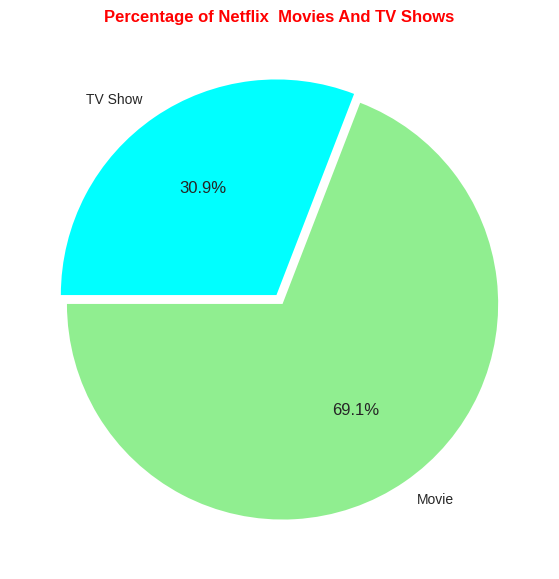

In [107]:
# Visualize The  Movies VS TV Shows
plt.figure(figsize=(14,7))
plt.title('Percentage of Netflix  Movies And TV Shows',fontweight ='bold', size = 12, color='red')
plt.pie(Netflix_dataset.type.value_counts(),explode=(0.025,0.025), labels=Netflix_dataset.type.value_counts().index, colors=['lightgreen','cyan'],autopct='%1.1f%%', startangle=180)
plt.show()

## **Observation**

### ◼ From the above we clearly see that there are more movies on Netflix than TV shows and Netflix has the percentage of the movies is 69.1% and TV shows is 30.9%.

### ◼ There are more than twice as many movies uploaded to Netflix as their as TV shows and This does not imply that movies are more indulgent than TV shows Because TV shows may have several seasons, which consist of a number of episodes, TV shows have a much longer run time than movies.

## **⚫ Exploring Top Genre of Movies**

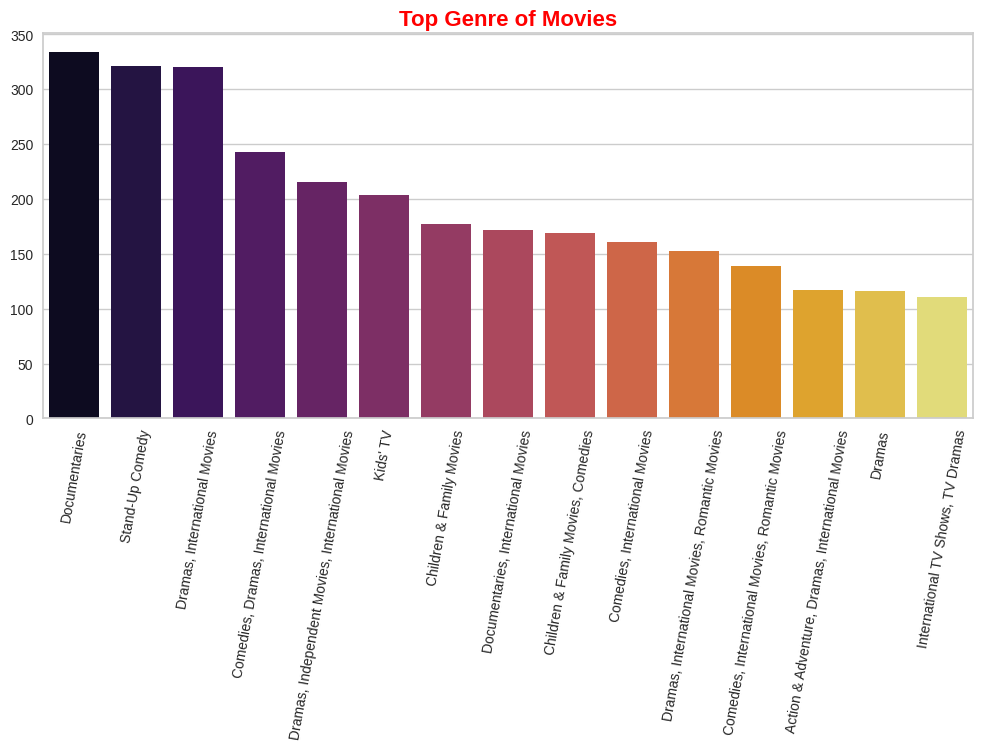

In [108]:
#  Visualize The Top Genre In Movies
plt.figure(figsize=(12,5))
sns.barplot(x = Netflix_dataset["listed_in"].value_counts().head(15).index,
            y = Netflix_dataset["listed_in"].value_counts().head(15).values,palette="inferno")
plt.xticks(rotation=80)
plt.title("Top Genre of Movies",size='16',fontweight="bold",color="red")
plt.show()

## **Observation**
### ◼ From the above graph reveals the top genres in movies on Netflix It highlights the most frequently occurring genres, indicating which genres are most popular among the available movie content and this insight aids in understanding user preferences can guide content acquisition and creation strategies to align with viewer interests.

### ◼  The gained insights can have a positive business impact to Knowing the top  genres in movies allows Netflix to tailor its content library to better match viewer preferences and this can lead to increased engagement, more satisfied subscribers, and potentially attract new subscribers interested in the popular genres.

## **⚫ Exploring Release Year On Movies And TV Shows Dataset**

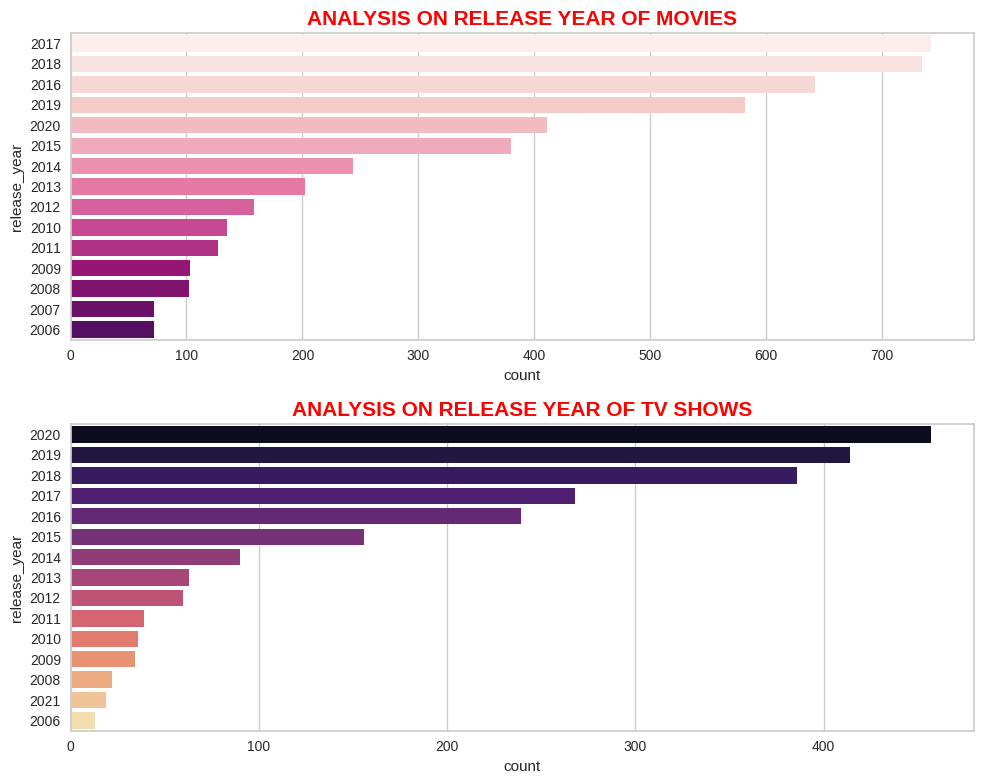

In [109]:
# Visualize Release Year On Movies And TV Shows
#creating two extra column
tv_shows=Netflix_dataset[Netflix_dataset['type']=='TV Show']
movies=Netflix_dataset[Netflix_dataset['type']=='Movie']

plt.figure(figsize=(10, 8))

# Analysis on release year of movie show
plt.subplot(2, 1, 1)
sns.countplot(y="release_year", data=movies, palette="RdPu", order=movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold',color='red')

# Analysis release year of TV show
plt.subplot(2, 1, 2)
sns.countplot(y="release_year", data=tv_shows, palette="magma", order=tv_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS', fontsize=15, fontweight='bold',color='red')

plt.tight_layout()
plt.show()

## **Observation**
### ◼ The following graph show that the trends in release years for movies and TV shows highlighting popular periods and production patterns and It enables comparison between mediums and showcases content growth and viewer preferences insights into cyclical trends and production shifts can be gained, offering valuable information about content creation and audience engagement.

### ◼ The Gained insights can positively influence content planning, targeted marketing, revenue generation, resource allocation, and audience engagement and the Netflix produced the most content in 2018 it has declined since then due to the COVID effect.

## **⚫ Exploring Release Movies And TV Shows As per Month**

In [110]:
# Add the Month Column
Netflix_dataset['Month'] = pd.DatetimeIndex(Netflix_dataset['date_added']).month
Netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1


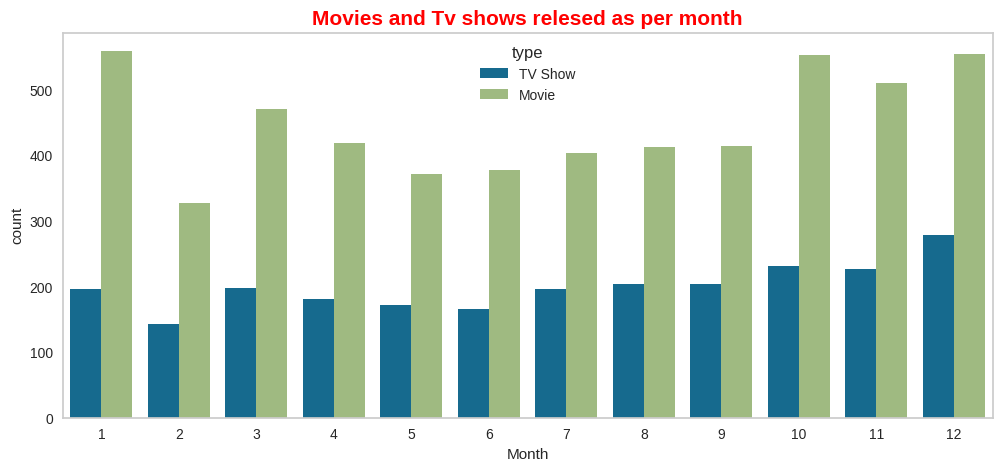

In [111]:
# Visualize The Movies And TV Show Released As Per Month
fig, ax = plt.subplots(figsize=(12,5))

sns.countplot(x='Month', hue='type',lw=5, data=Netflix_dataset, ax=ax)
plt.title('Movies and Tv shows relesed as per month',fontweight ='bold', size = 15 , color='red')
plt.grid(False)
plt.show()

## **Observation**

### ◼ According to the above graph, movie releases are higher than TV show releases per month.

### ◼ The best 4 months to release content are October, November, December, and January which are generally winter season . In winter season peoples stay at home due to winter holidays or heavy snowfall . If Netflix release movies on these months they gain more views, gain new subscribers and increase revenue,it tends to bussiness growth.

## **⚫ Exploring Country Contribution On Netflix Dataset**

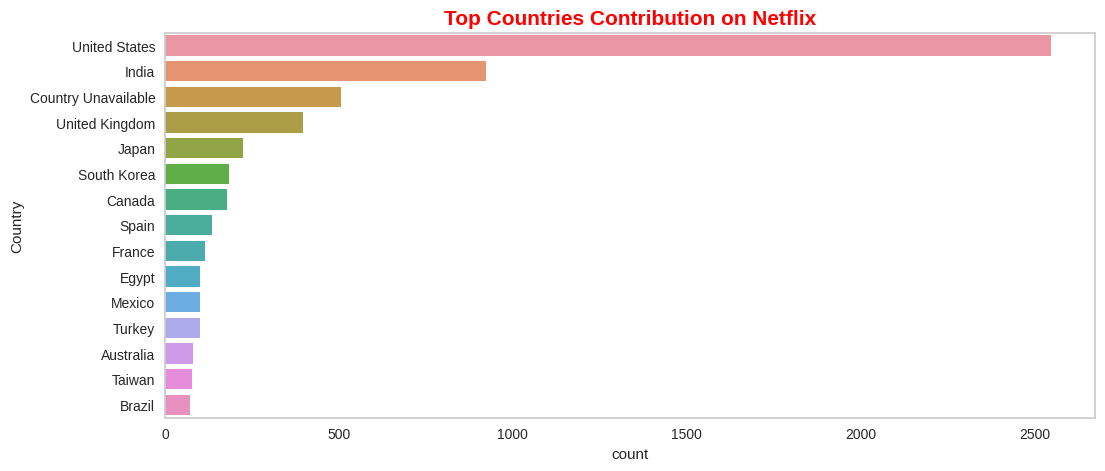

In [112]:
# Visualize The Country Contribution On Netflix Dataset
plt.figure(figsize=(12,5))
g = sns.countplot(y = Netflix_dataset['country'], order=Netflix_dataset['country'].value_counts().index[:15])
plt.title('Top Countries Contribution on Netflix',fontweight ='bold', size = 15 ,color='red')
plt.ylabel('Country')
plt.grid(False)
plt.show()

## **Observation**

### ◼ From the above bar graph, we can see the top  countries that contribute the most on Netflix  and the content type proportions within each country, which can inform content acquisition strategies.The United States produces the most content in terms of quantity.

### ◼ This insights empower informed decisions, potentially leading to targeted content investments and content acquisition agreements for improved viewer engagement and business growth.

## **⚫ Exploring The Ratings On Movies And TV Show Dataset**

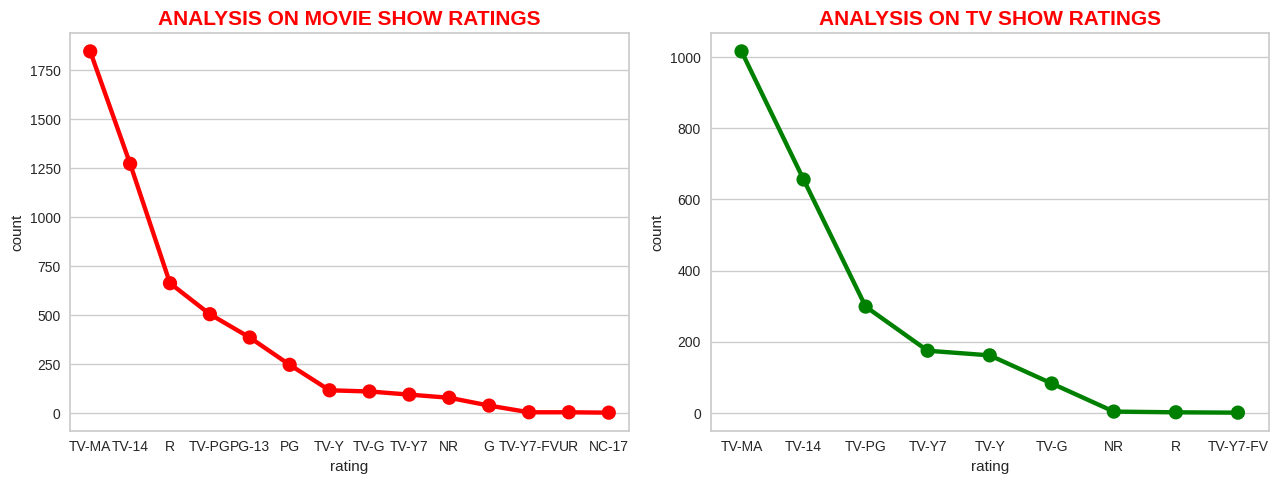

In [113]:
# Visualize the rating on movies and TV shows
plt.figure(figsize=(13, 5))

# Analysis on rating based on overall movie show rating system
plt.subplot(1, 2, 1)  # Create the first subplot for movie show ratings.
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
sns.pointplot(x='rating', y='count', data=movies_ratings, color='red')
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold',color='red')

# Analysis on rating based on overall TV show rating system
plt.subplot(1, 2, 2)  # Create the second subplot for TV show ratings.
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count', ascending=False)
sns.pointplot(x='rating', y='count', data=tv_ratings, color='green')
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold',color='red')

plt.tight_layout()  # Adjust the spacing between subplots.
plt.show()


## **Observation**
### ◼ From the above graph shows that the  ratings on  movies and TV shows are watched by TV-MA i,e Adults and it helps identify popular rating ranges and potential trends in audience preferences for different types of content.

### ◼ The insights gained from following can positively impact business decisions. they can guide content creation, marketing strategies, and investment in popular rating ranges, leading to increased viewership and revenue.

## **⚫ Exploring The Top Actor On Netflix**

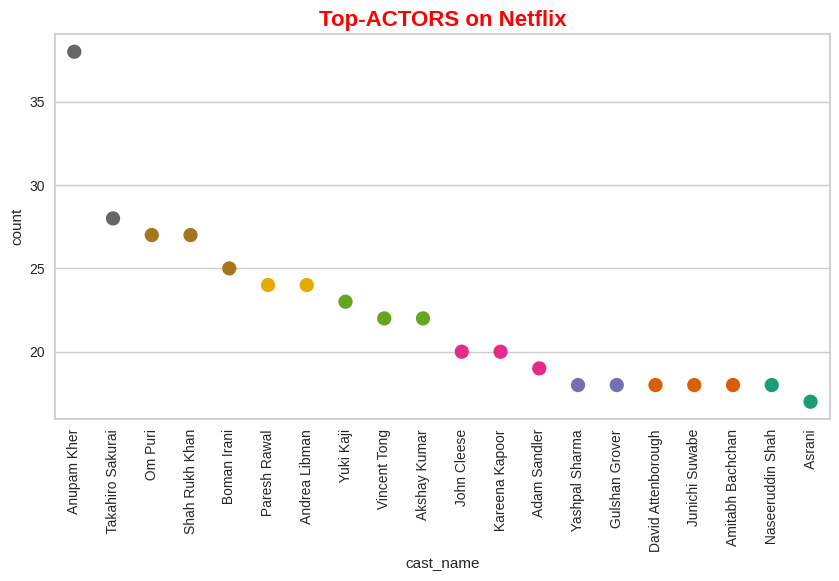

In [114]:
# Visualize The Top Actor On Netflix
Netflix_dataset['cast_name'] = Netflix_dataset['cast'].apply(lambda x :  x.split(','))
cast_count = []
for i in Netflix_dataset['cast_name']: cast_count += i

cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(10,5))
sns.pointplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-ACTORS on Netflix",size='16',fontweight="bold",color='red')
plt.xticks(rotation=90)
plt.show()

## **Observation**

### ◼ From the following chart show that the Indian actor Anupam Kher is the top actor on the Netflix and  it provides insights into popular actors, potentially influencing casting decisions and content creation.
### ◼ The insights can positively impact content strategy and  Recognizing popular actors can lead to collaborations that attract a larger audience and enhance viewer engagement.

## **⚫ Exploring Top Movies Directors**

Text(0.5, 1.0, 'Top Movie Directors')

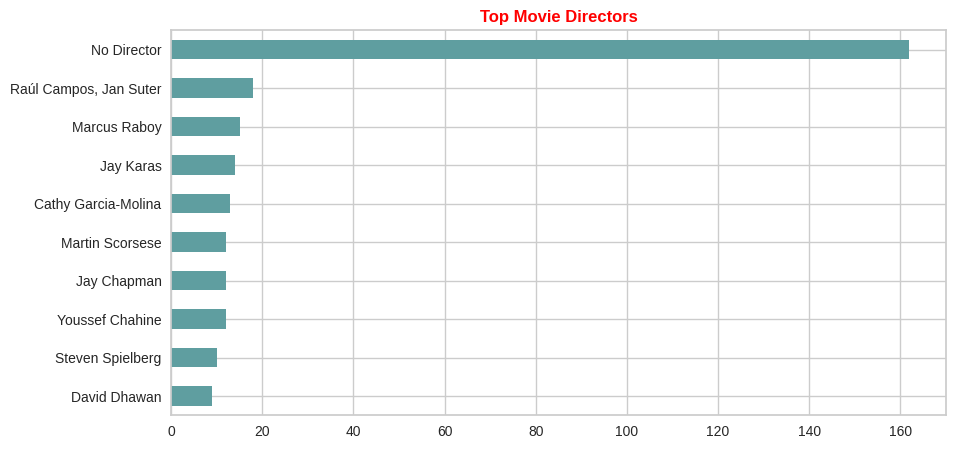

In [115]:
# Visualize The Top Movies Director
plt.figure(figsize=(10,5))
Netflix_dataset[~(Netflix_dataset['director']=='Unknown') & (Netflix_dataset['type']=='Movie')].director.value_counts().nlargest(10).sort_values().plot(kind='barh', color = "cadetblue")
plt.title('Top Movie Directors', fontweight = 'bold',color='red')

## **Observation**
### From the above bar graph we see that the most of the movies director name is not given , moving forward we see netflix users likes most which is directed by Jan Suter and Raul Campos.

## **⚫ Exploring The Top Countries With Content Available**

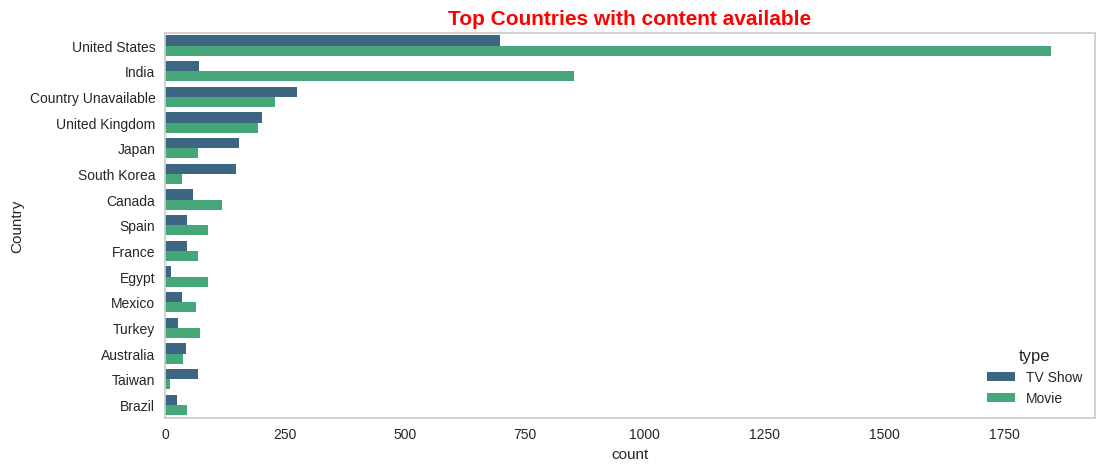

In [116]:
# Visualize The Top Countries With Content Available
filtered_genres = Netflix_dataset.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(12,5))
g = sns.countplot(y = Netflix_dataset['country'], hue=Netflix_dataset['type'],order=Netflix_dataset['country'].value_counts().index[:15],palette='viridis')
plt.title('Top Countries with content available',fontweight ='bold', size = 15,color='red')
plt.ylabel('Country')
plt.grid(False)
plt.show()

## **Observation**

### ◼ The above graph show that the United States is a leading producer of both types of content and this makes sense since Netflix is a US company. The majority of Netflix content available in India, Canada, Spain, France, Egypt, and Turkey consists of movies and  the production of movies and television shows in the United Kingdom is about equal. South Korea on the other hand, has a higher frequency of television shows, which explains the current KDrama culture.

## **⚫  Distribution Of Duration OF Movies**

<ipython-input-117-7dcb94482fa3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),kde=False, color=['purple'])


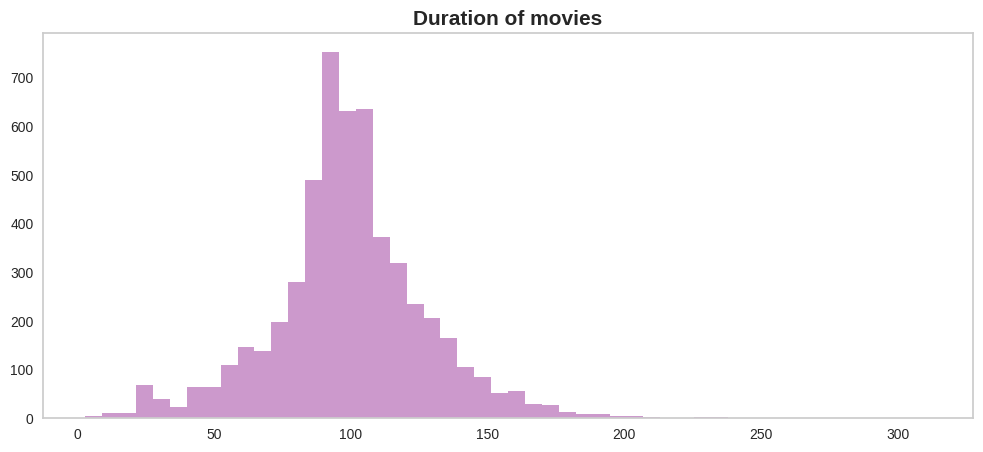

In [117]:
# Visualize The Duration Of Movies
plt.figure(figsize=(12,5))
#REGULAR EXPRESSION PATTERN \D IS A REGEX PATTERN FOR A DIGIT, AND + IS A REGEX PATTERN FOR AT LEAST
sns.distplot(netflix_movies['duration'].str.extract('(\d+)'),kde=False, color=['purple'])
plt.title('Duration of movies',fontweight="bold", size=15)
plt.grid(False)
plt.show()

## **Observation**
### ◼ The graph show that the frequency of  movies duration ranges which netflix user prefers 60 to 120 mins. It provides an understanding of which duration ranges are more common, aiding programming decisions. The insights can impact scheduling and content creation. Identifying popular duration ranges can lead to improved audience engagement and tailored programming.

## **⚫ Exploring Number Of Seasons OF TV Shows**

<function matplotlib.pyplot.show(close=None, block=None)>

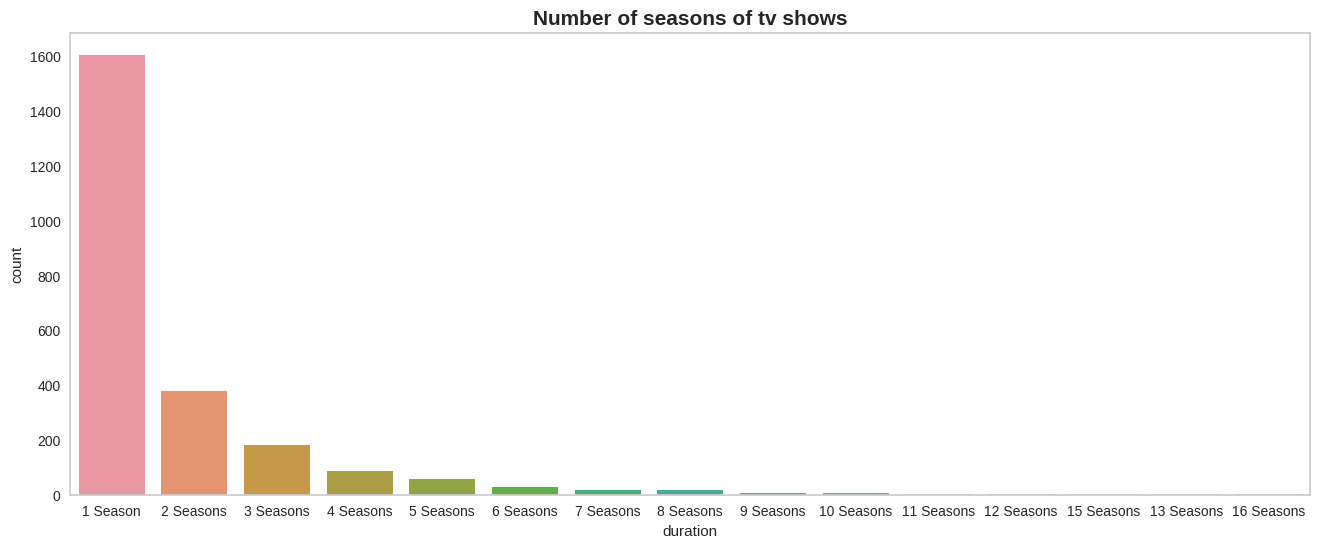

In [118]:
# Visualize The Number Of Seasons Of TV Shows
plt.figure(figsize=(16,6))
plt.title("Number of seasons of tv shows",fontweight='bold', size=15)
sns.countplot(x=netflix_shows['duration'],data=netflix_shows,order = netflix_shows['duration'].value_counts().index)
plt.grid(False)
plt.show

## **Observation**

### ◼ From the following graph has been noted that  1608 tv shows only have one season and There are only a few television shows that have the longest running times on the Tv shows that means users like tv shows with more seasons . If netflix release more seasons of tv shows then it will benefited to bussiness.

## ▶  **Netflix Content Is Available For Different Age Groups In Different Countries.**

In [119]:
# Assigning The Rating Into Groups Categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
Netflix_dataset['target_ages'] = Netflix_dataset['rating'].replace(ratings)

## ⚫ **Correlation Analysis**

In [120]:
# Preparing Data For The Correlation Heatmap
Netflix_dataset['target_ages'] = pd.Categorical(Netflix_dataset['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [121]:
# Assigning With Countries
Netflix_dataset['count'] = 1
data = Netflix_dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = Netflix_dataset['country']

Netflix_dataset_heatmap = Netflix_dataset.loc[Netflix_dataset['country'].isin(data)]
Netflix_dataset_heatmap = pd.crosstab(Netflix_dataset_heatmap['country'], Netflix_dataset_heatmap['target_ages'],normalize = "index").T
Netflix_dataset_heatmap

<ipython-input-121-be0908e498af>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = Netflix_dataset.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]


country,Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain","Argentina, United States","Argentina, United States, Mexico",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
target_ages,,,,,,,,,,,,,,,,,,,,,
Kids,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.2,0.0,1.0
Older Kids,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Teens,0.14,1.0,1.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4,0.0,0.0
Adults,0.74,0.0,0.0,1.0,1.0,1.0,1.0,0.875,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.4,1.0,0.0


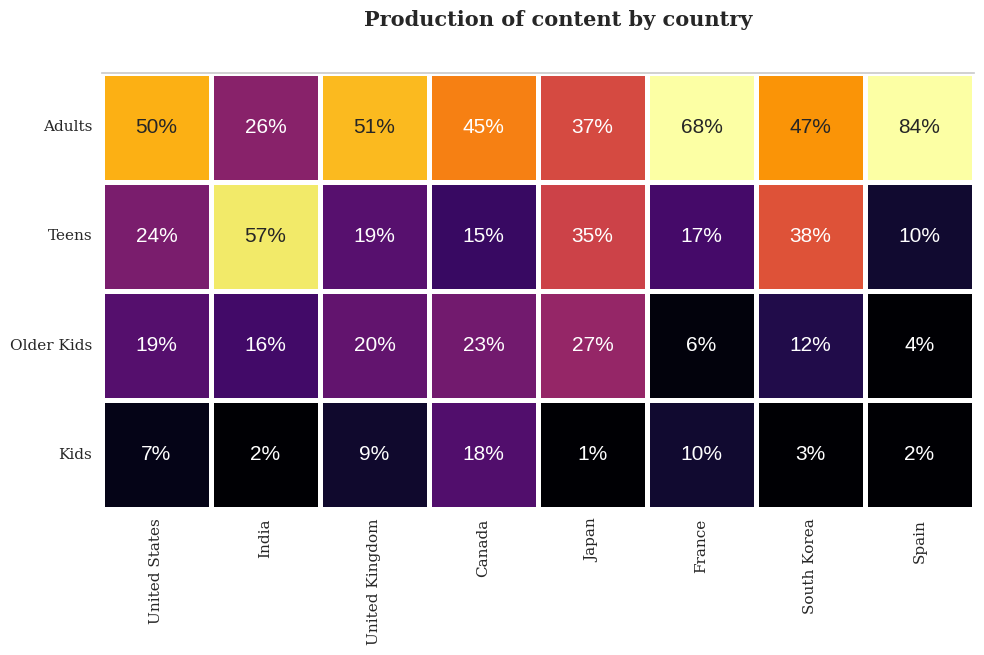

In [122]:
# Visualize The Correlation Analysis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(Netflix_dataset_heatmap.loc[age_order,country_order2],cmap="inferno",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Production of content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

## **Observation**

### ◼ According to the correlation graph adults prefer to watch movies and TV shows in Spain, France, the United Kingdom, and the United States. In India, 57 percent of teenager watch movies and TV shows, while only 26 percent of adults do that means in India Netflix need to more concentrate to Teenager and Spain is producing the most adult content on Netflix, at 84%.

There are 144692 words in the combination of all titles.


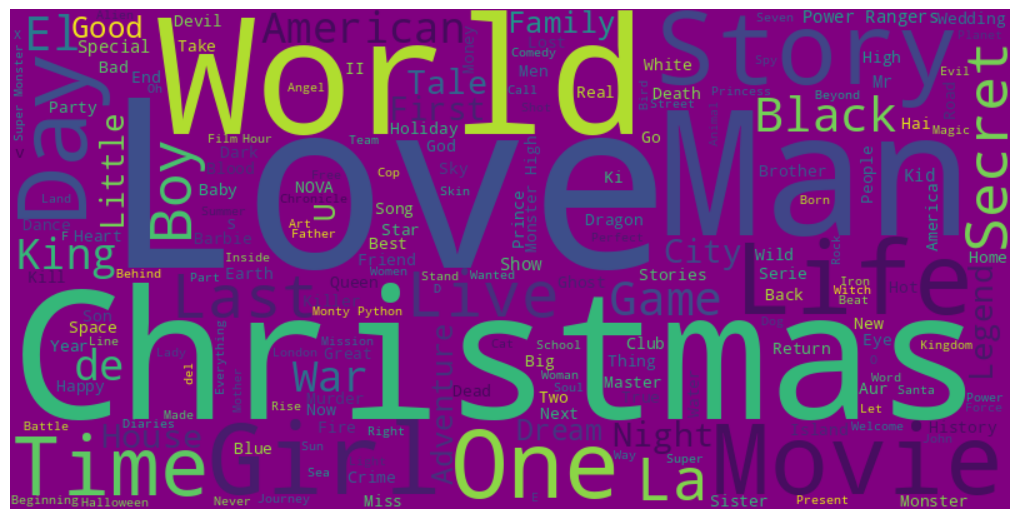

In [123]:
#chcking word cloud from title column
text = " ".join(topic for topic in Netflix_dataset.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="purple", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (10,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


# ⬛  **Data Analysis With Country India**

In [124]:
# Check The Pandas Version
import pandas
print(pandas.__version__)

1.5.3


In [170]:
# intall pip
pip install --upgrade pandas

In [126]:
# Get The Data Related To India
grp = Netflix_dataset.groupby('country')
India=grp.get_group('India')

## ▶ **Exploring Top Content Release Year In India**




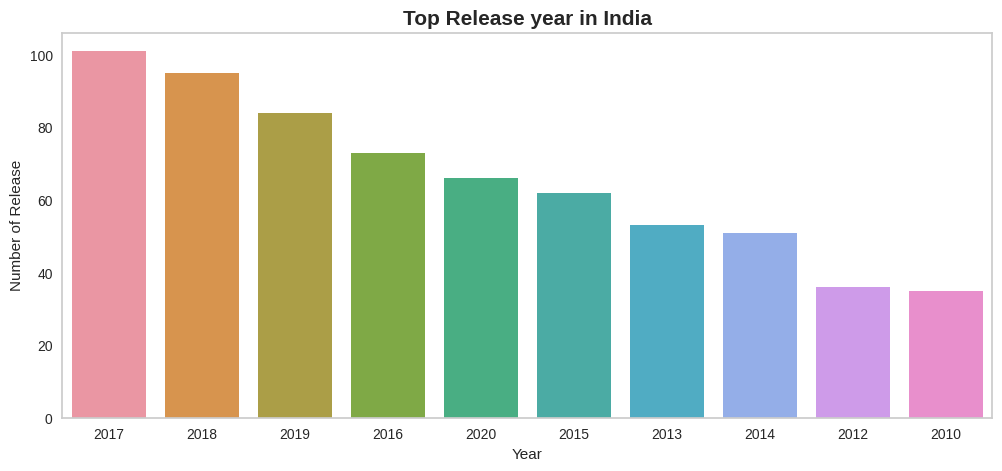

In [127]:
# Visualize Top Content Release Year In India
plt.figure(figsize=(12,5))
g = sns.countplot(x = India['release_year'], order=India['release_year'].value_counts().index[:10])
plt.title('Top Release year in India',fontweight='bold', size=15)
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.grid(False)
plt.show()

### ◼ From the above chart show that The most popular content released in 2017 according to India.we can also says that as time goes on movies release increases in india and to gain maximum benefit Netflix should release movies or tv shows according to their prefreence.

## ▶ **Exploring Top Rating In India**


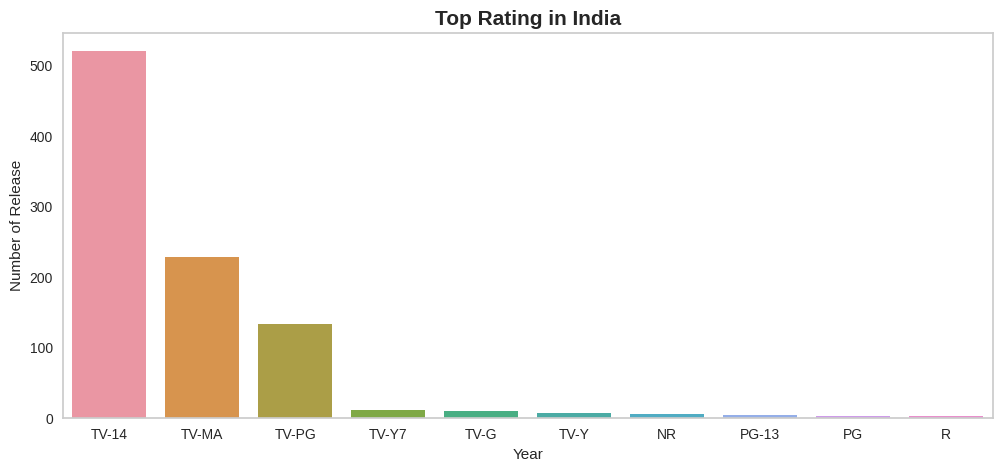

In [128]:
# Visualize Top Ratings In India
plt.figure(figsize=(12,5))
g = sns.countplot(x = India['rating'], order=India['rating'].value_counts().index[:10])
plt.title('Top Rating in India',fontweight='bold', size=15)
plt.xlabel('Year')
plt.ylabel('Number of Release')
plt.grid(False)
plt.show()

### ◼  From the above graph the Teenage content has the highest rating in India.This insights can be valuable for content strategists and decision-makers. By understanding  that in india teenagers are higher content additions.

## ▶ **Exploring Top Genres In India**


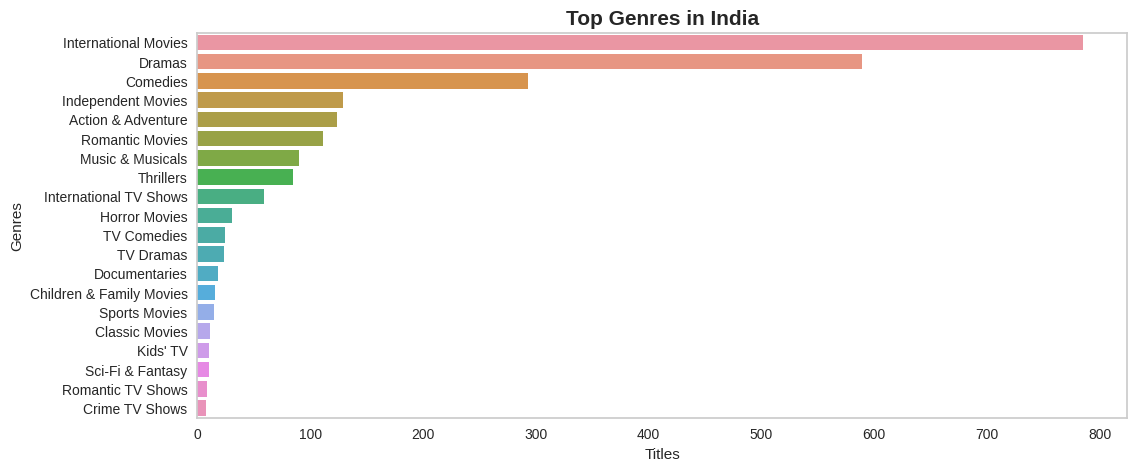

In [129]:
# Visulize the top genre in india
filtered_genres1 = India.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(12,5))
g = sns.countplot(y = filtered_genres1,order=filtered_genres1.value_counts().index[:20])
plt.title('Top Genres in India',fontweight='bold', size=15)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.grid(False)
plt.show()

### ◼ According to this graph the International Movies , Dramas and Comedies are the top 3 genres content is in high demand in India.It indicate that for indian subscribers Netflix should focus on their International movies content to gain more views and new subscribers.

In [130]:
# Check The Column
Netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Month', 'cast_name', 'target_ages', 'count'],
      dtype='object')

In [131]:
# Creating A New Dataframe For Further Analysis
new_Netflix_dataset = Netflix_dataset.drop(columns=['show_id','director', 'title', 'cast','duration', 'date_added', 'description','cast_name'],axis=1)
new_Netflix_dataset

,type,country,release_year,rating,listed_in,Month,target_ages,count
0,TV Show,Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",8,Adults,1
1,Movie,Mexico,2016,TV-MA,"Dramas, International Movies",12,Adults,1
2,Movie,Singapore,2011,R,"Horror Movies, International Movies",12,Adults,1
3,Movie,United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",11,Teens,1
4,Movie,United States,2008,PG-13,Dramas,1,Teens,1
...,...,...,...,...,...,...,...,...
7782,Movie,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,"Dramas, International Movies",10,Adults,1
7783,Movie,India,2015,TV-14,"Dramas, International Movies, Music & Musicals",3,Teens,1
7784,Movie,Country Unavailable,2019,TV-MA,"Documentaries, International Movies, Music & M...",9,Adults,1
7785,TV Show,Australia,2019,TV-PG,"International TV Shows, Reality TV",10,Older Kids,1


# ⬛ **DATA ENCODING**

In [132]:
# Importing Libraries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_Netflix_dataset["type"] = le.fit_transform(new_Netflix_dataset["type"])
new_Netflix_dataset["country"] = le.fit_transform(new_Netflix_dataset["country"])
new_Netflix_dataset["target_ages"] = le.fit_transform(new_Netflix_dataset["target_ages"])
new_Netflix_dataset['rating'] = le.fit_transform(new_Netflix_dataset['rating'])
new_Netflix_dataset['listed_in'] = le.fit_transform(new_Netflix_dataset['listed_in'])

# **⬛ Hypothesis Testing**

## A]  Hypothesis Testing
### HO:The duration which is more than 90 mins are NOT movies.

### H1:The duration which is more than 90 mins are movies.

In [133]:
# Making copy of data for hypothesis test
netflix_hypo=Netflix_dataset.copy()
# showing head
netflix_hypo.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,cast_name,target_ages,count
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1


In [134]:
# From duration column extractin string
netflix_hypo['duration']= netflix_hypo['duration'].str.extract('(\d+)')

# Changing the duration type to numeric
netflix_hypo['duration'] = pd.to_numeric(netflix_hypo['duration'])

netflix_hypo['type'] = pd.Categorical(netflix_hypo['type'], categories=['Movie','TV Show'])

# showing head
netflix_hypo.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,cast_name,target_ages,count
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1


In [135]:
# Group_by type and duration
netflix_hypo_group = netflix_hypo[['duration','type']].groupby(by='type')
# mean of group_by variable
nhg=netflix_hypo_group.mean().reset_index()
nhg

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [136]:
# In a and b variable grouping values
a = netflix_hypo_group.get_group('Movie')
b = netflix_hypo_group.get_group('TV Show')

# mean and std. calutation for movies and tv shows variables
m1 = a.mean()
s1 = a.std()

m2= b.mean()
s2 = b.std()

print('Mean for movies  {} \n Mean for  tv shows {}'.format(m1,m2))
print('Std for  movies  {} \n Std for  tv shows {}'.format(s2,s1))

Mean for movies  duration    99.330417
dtype: float64 
 Mean for  tv shows duration    1.761468
dtype: float64
Std for  movies  duration    1.561099
dtype: float64 
 Std for  tv shows duration    28.524206
dtype: float64


<ipython-input-136-f6d4e001e77a>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m1 = a.mean()
<ipython-input-136-f6d4e001e77a>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s1 = a.std()
<ipython-input-136-f6d4e001e77a>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m2= b.mean()
<ipython-input-136-

In [137]:
# Length of groups and degree of freedom(DOF)
n1 = len(a)
n2= len(b)
print(n1)
print(n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# tvalue
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372
2398
dof 7768
SP_2 = duration    252.749896
dtype: float64
SP duration    15.89811
dtype: float64
tvalue 249.88962005047787


In [138]:
# t-distribution
print(stats.t.ppf(0.025,dof))
print(stats.t.ppf(0.975,dof))

-1.9602694215408423
1.9602694215408418


### ◼ Because the t-value is not in the range, the null hypothesis is rejected. As a result, The duration which is more than 90 mins are movies.

## B]  Hypothesis Testing
### HO:movies rated for kids and older kids are at least two hours long.

### H1:movies rated for kids and older kids are not at least two hours long.

In [139]:
# Making copy of data for hypothesis test
netflix_hypo2=Netflix_dataset.copy()
# showing head
netflix_hypo2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,cast_name,target_ages,count
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,"[João Miguel, Bianca Comparato, Michel Gomes...",Adults,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1


In [140]:
# Filtering movie from Type column
netflix_hypo2 = netflix_hypo2[netflix_hypo2["type"] == "Movie"]

In [141]:
# let's see unique target ages
netflix_hypo2['target_ages'].unique()

['Adults', 'Teens', 'Older Kids', 'Kids']
Categories (4, object): ['Kids', 'Older Kids', 'Teens', 'Adults']

In [142]:
# Another column is target_ages (4 classes).
netflix_hypo2['target_ages'] = pd.Categorical(netflix_hypo2['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# from duration column extractin string part
netflix_hypo2['duration']= netflix_hypo2['duration'].str.extract('(\d+)')

# change duration column into numeric type
netflix_hypo2['duration'] = pd.to_numeric(netflix_hypo2['duration'])

# showing head
netflix_hypo2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,cast_name,target_ages,count
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Adults,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Adults,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,"[Elijah Wood, John C. Reilly, Jennifer Conne...",Teens,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",Teens,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",6,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A...",Adults,1


In [143]:
# Group_by type and duration
netflix_hypo_group2 = netflix_hypo2[['duration','target_ages']].groupby(by='target_ages')
# mean of group_by variable
nhg2=netflix_hypo_group2.mean().reset_index()
nhg2

,target_ages,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,110.025332
3,Adults,98.275145


In [144]:
# In c and d variable grouping values
c = netflix_hypo_group2.get_group('Kids')
d = netflix_hypo_group2.get_group('Older Kids')

# mean and std. calutation for kids and older kids variables
m1 = c.mean()
s1 = c.std()

m2= d.mean()
s2 = d.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(m1,m2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(s2,s1))


Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


<ipython-input-144-806f9b55ad27>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m1 = c.mean()
<ipython-input-144-806f9b55ad27>:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s1 = c.std()
<ipython-input-144-806f9b55ad27>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  m2= d.mean()
<ipython-input-144-

In [145]:
# Length of groups and DOF
p = len(c)
q= len(d)
print(p)
print(q)

dof1 = p+q-2
print('dof',dof1)

sp_2 = ((q-1)*s1**2  + (p-1)*s2**2) / dof1
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (m1-m2)/(sp * np.sqrt(1/p + 1/q))
print('tvalue',t_val[0])

267
852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [146]:
# t-distribution
print(stats.t.ppf(0.025,dof1))
print(stats.t.ppf(0.975,dof1))

-1.9620900365868952
1.9620900365868947


### ◼ Because the t-value is not in the range, the null hypothesis is rejected.As a result, movies rated for kids and older kids are not at least two hours long.



# **⬛ CLUSTERING**

### Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them.

In [147]:
# check the head of dataset
new_Netflix_dataset.head()

,type,country,release_year,rating,listed_in,Month,target_ages,count
0,1,39,2020,8,397,8,0,1
1,0,309,2016,8,309,12,0,1
2,0,380,2011,5,335,12,0,1
3,0,550,2009,4,47,11,3,1
4,0,550,2008,4,293,1,3,1


In [148]:
# check the information of dataset
new_Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   type          7770 non-null   int64
 1   country       7770 non-null   int64
 2   release_year  7770 non-null   int64
 3   rating        7770 non-null   int64
 4   listed_in     7770 non-null   int64
 5   Month         7770 non-null   int64
 6   target_ages   7770 non-null   int64
 7   count         7770 non-null   int64
dtypes: int64(8)
memory usage: 546.3 KB


# **⬛ Data Transformation**

In [149]:
# Transform dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  #Transform features by scaling each feature to a given range
sc = scaler.fit_transform(new_Netflix_dataset)
netflix_data = pd.DataFrame(sc, columns=list(new_Netflix_dataset.columns))
X = netflix_data

In [150]:
# check the shape
X.shape

(7770, 8)

# **▶ Principal Component Analysis**

### Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.



In [151]:
# Function  to understand the variance for different N-component
def pca_variance(n_components):
  pca= PCA(n_components= n_components)
  pca.fit(X)
  print(sum(pca.explained_variance_ratio_))

In [152]:
# get pca variance
pca_variance(7)


1.0000000000000002


In [153]:
# pca component
pca = PCA(n_components=7)
pca.fit(X)

PCA(n_components=7)

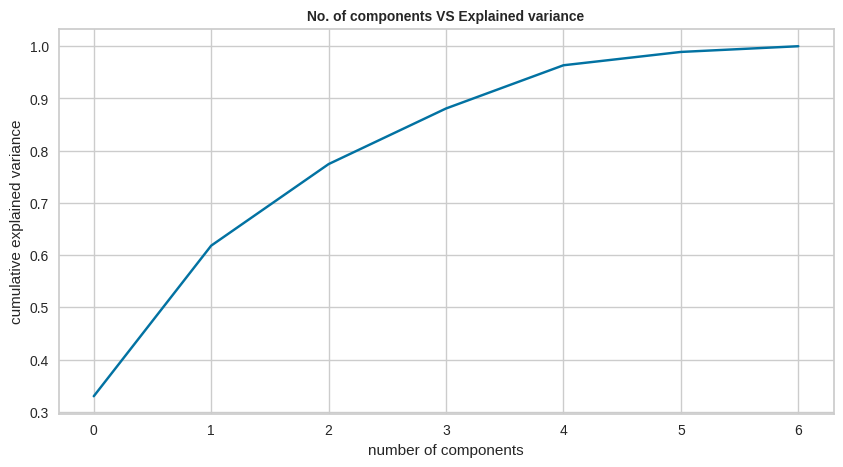

In [154]:
# Plotting components Vs explained varience
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('No. of components VS Explained variance',fontweight='bold', size=10)
plt.show()

### ◼ Typically, we want the explained variance to be between 95 and 99%. In this case, 7 principal components are required to explain 99% (most approximate is 100%) of the variance.

In [155]:
# get the shape
X_pca = pca.fit_transform(X)
X_pca.shape

(7770, 7)

# **▶ K-Means Clustering**
### K-Means is an unsupervised machine learning algorithm that assigns data points to one of the K clusters. Unsupervised, as mentioned before, means that the data doesn't have group labels as you'd get in a supervised problem.


In [156]:
# k-means clustering
kmeans = KMeans( init="k-means++", n_clusters=8, max_iter=300,   random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

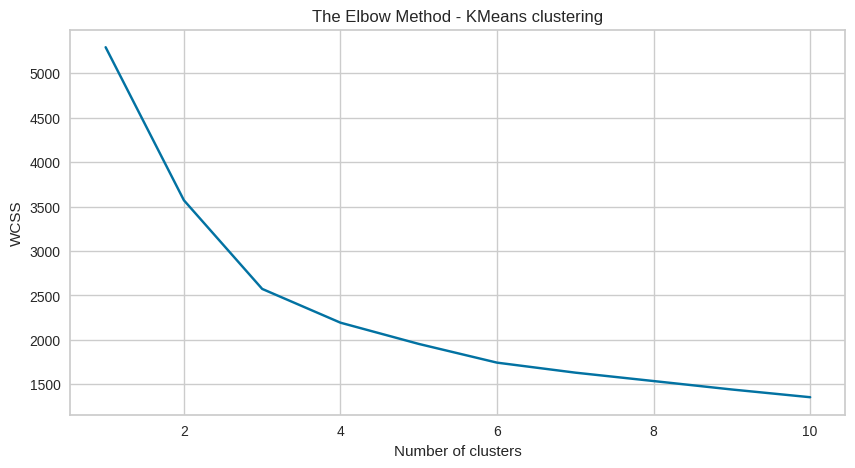

In [157]:
# Finding optimal number of clusters using the elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state= 33)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

# plot elbow graph
number_clusters = range(1,11)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### ◼ To determine the optimal number of clusters, we have to select the value of k at the "elbow," i.e., the point after which the distortion/inertia start decreasing in a linear fashion. Thus, for the given data, we conclude that the optimal number of clusters for the data is 4.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

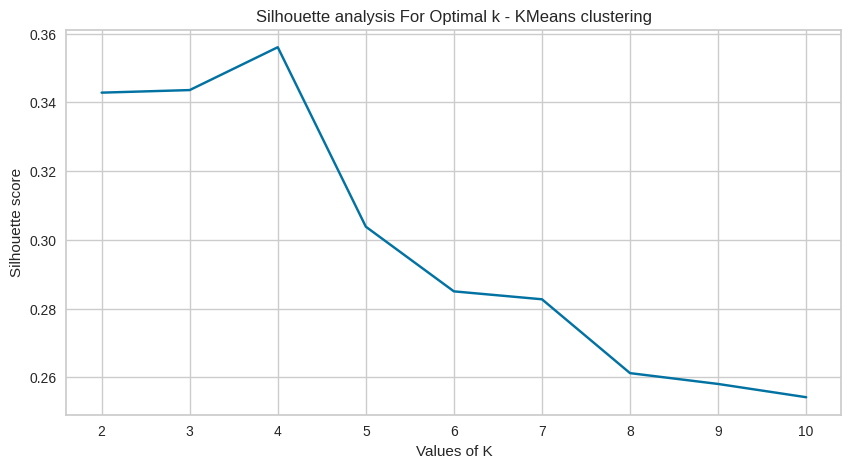

In [158]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,11)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_

  # silhouette score
  silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [159]:
# sillhoute score of clusters
sill = []
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state = 51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 2 	 Sillhoute: 0.3428


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 3 	 Sillhoute: 0.3435


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 4 	 Sillhoute: 0.3560


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 5 	 Sillhoute: 0.3038


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 6 	 Sillhoute: 0.2850


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 7 	 Sillhoute: 0.2827


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 8 	 Sillhoute: 0.2684


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 9 	 Sillhoute: 0.2572


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster: 10 	 Sillhoute: 0.2541


In [160]:
# Silhouette score analysis
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(X)
      centers = km.cluster_centers_

      score = silhouette_score(X, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X)
       # FIT THE TRAINING DATA TO THE VISUALIZER
      visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.3427980912637405


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


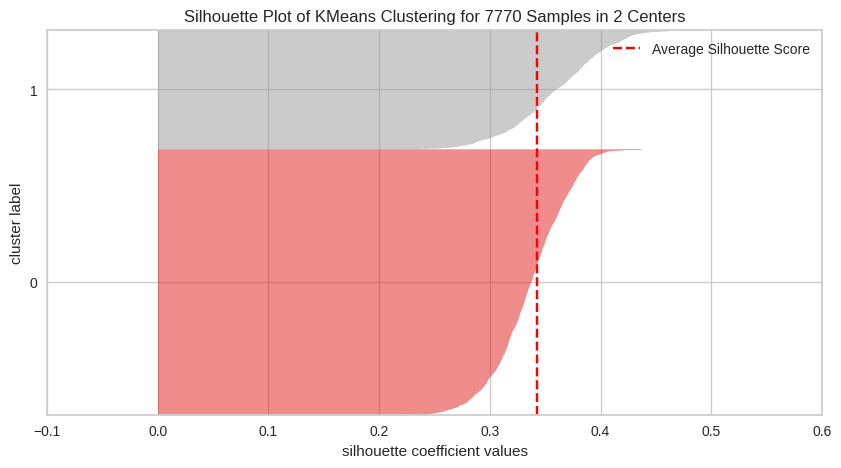

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, silhouette score is 0.3435446392746076


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


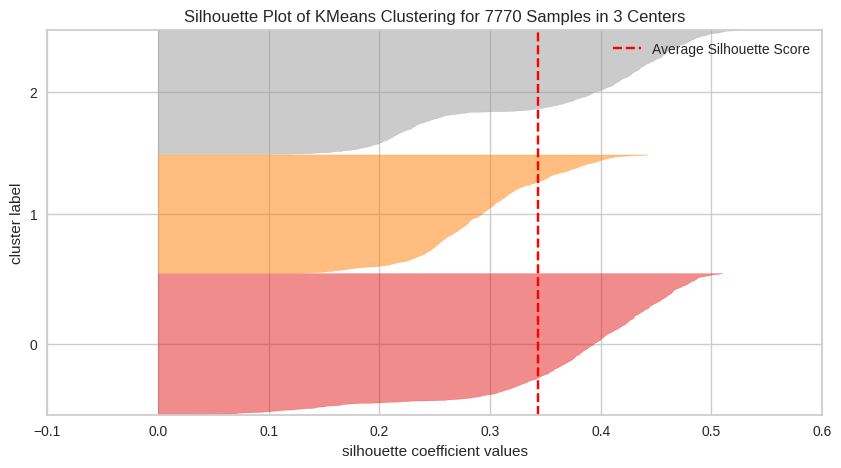

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.35601167401465045


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


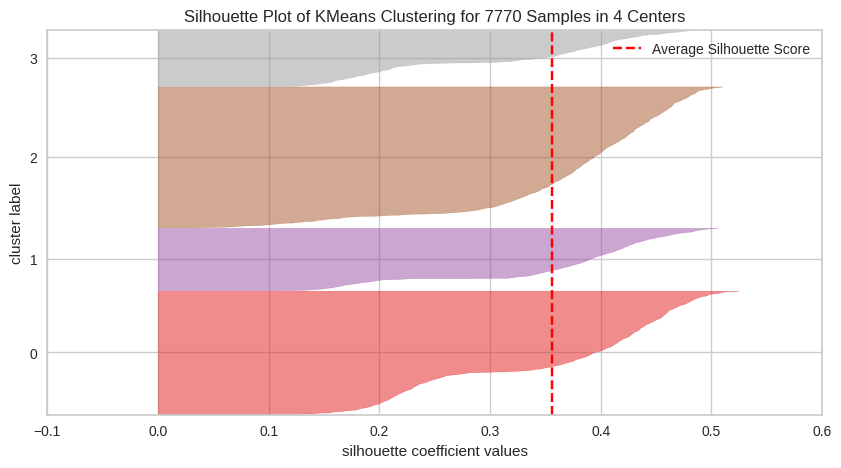

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.3038017127894104


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


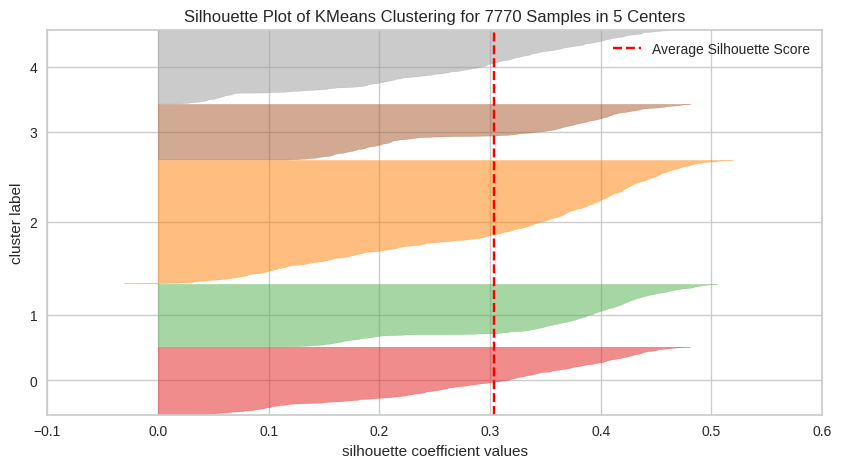

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.28499185237238683


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


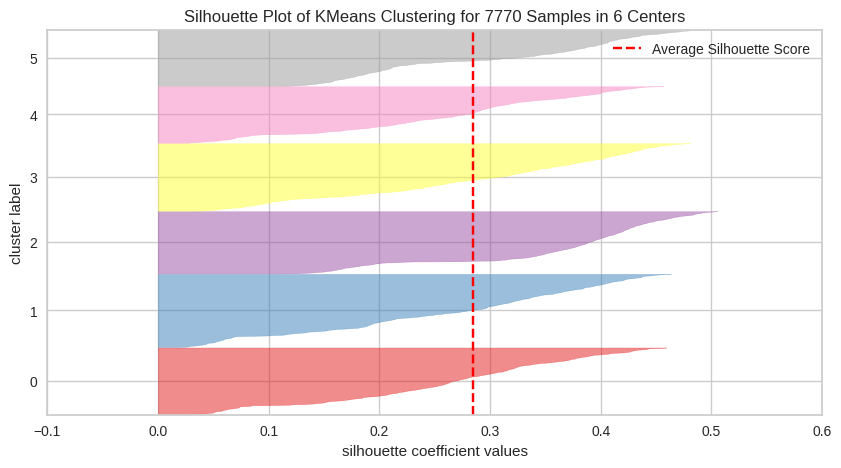

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.2826897515783034


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


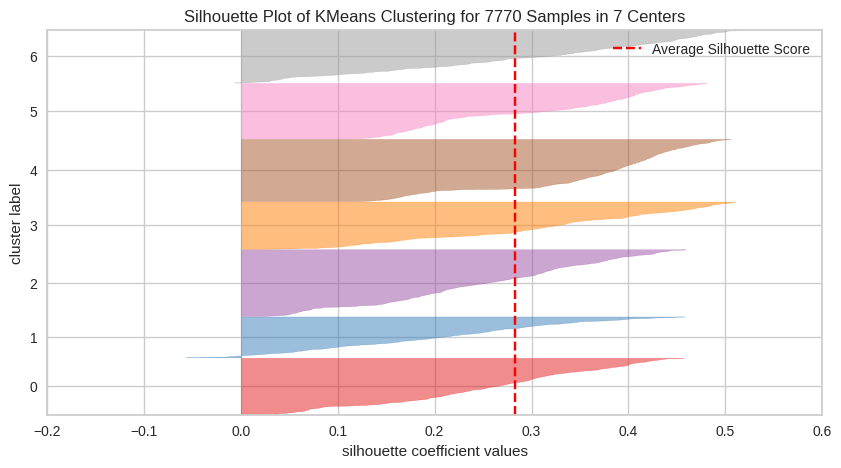

In [161]:
# silhouette score
silhouette_score_analysis(8)

### ◼ Here is the silhouette analysis done on the above plots to select an optimal value for n_clusters.The value of 4 for n_clusters looks to be the optimal one and silhouette score is 0.356.

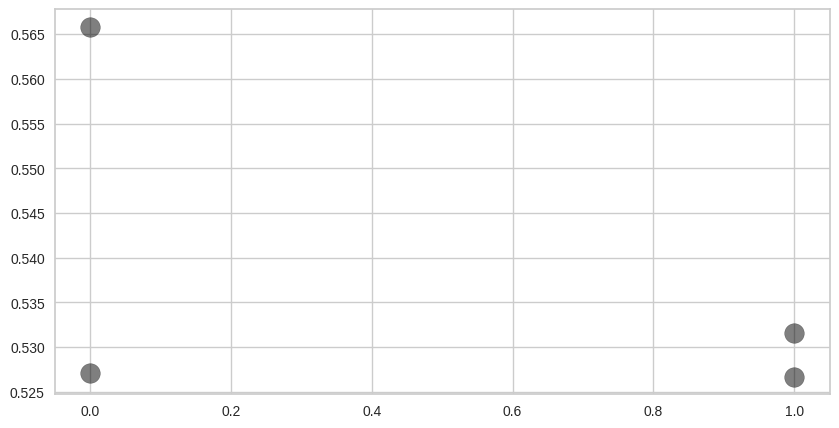

In [162]:
# Looks like we can go with 4 clusters.
kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


In [163]:
# fit k-means
labels = kmeans.fit_predict(X)

# SILHOUETTE SCORE OF CLUSTERS
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, kmeans.labels_))


Silhouette Coefficient: 0.356


In [164]:
# Fitting the k-means algorithm on lower features
kmeans= KMeans(n_clusters=4, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=1)

In [165]:
# SILHOUETTE SCORE for lower featrues
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_pca, kmeans.labels_))

Silhouette Coefficient:  0.285


# **▶ Hirarchical Clustering**

### Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA. In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

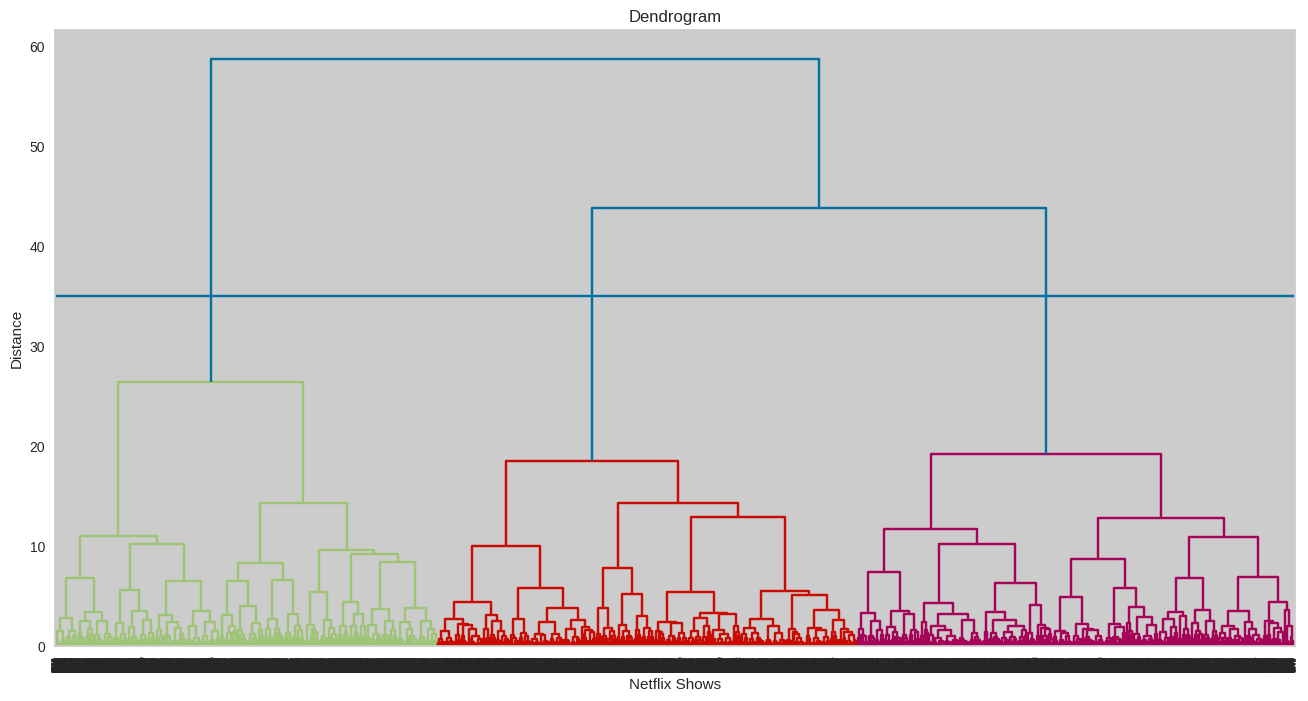

In [166]:
# Determine the optimal number of clusters
import scipy.cluster.hierarchy as shc
# ploting dendrogram
plt.figure(figsize=(16, 8))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
#plt.axhline(y= 5, color='r', linestyle='--')
plt.axhline(y=35)

plt.show()


### ◼  Assume we cut vertical lines with a horizontal line to obtain the number of clusters. Number of clusters = 3

# **▶ Agglomerative Clustering**

### The agglomerative hierarchical clustering algorithm is also known as the bottom-up approach.This algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets

In [167]:
# Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
aggh.fit(X)
# Predicting using our model
y_hc=aggh.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [168]:
# Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: 0.333


## ⚫ **Which Evaluation metrics did you consider for a positive business impact and why**?

## **Silhouette score**

### Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating  Silhouette score is a useful metric for a positive business impact because it can help identify the optimal number of clusters for a dataset. This in turn, can help companies make data-driven decisions and allocate resources more efficiently based on the distinct patterns and characteristics of each cluster.

## ⚫ **Which ML model did you choose from the above created models as your final prediction model and why?**

### After evaluating multiple machine learning models including K-Means Clustering and Hierarchical Clustering - Agglomerative. we selected K-Means Clustering as our final prediction model.


### We chose K-Means Clustering because it performed well on our evaluation dataset in terms of silhouette score . The model was able to cluster similar movies and TV shows together based on their shared attributes, which allowed us to make better recommendations to our users. Additionally, K-Means Clustering was relatively easy to implement and maintain,which made it a practical choice for our project.



In [169]:
# Storing metrics in order to make dataframe of metrics
Model          = ['K-Means Clustering', 'Agglomerative Hierarchical Clustering']
S_score  = [0.356,0.333]
No_of_cluster = [4,3]
# Create dataframe from the lists
data = {'Model' : Model,
        'Number of clusters': No_of_cluster,
        'silhouette_score'  : S_score}
Metric_df = pd.DataFrame(data)

# Printing dataframe
Metric_df

,Model,Number of clusters,silhouette_score
0,K-Means Clustering,4,0.356
1,Agglomerative Hierarchical Clustering,3,0.333


# **⬛ Project Summary**

### A unsupervised machine Learning predictive model for Netflix movies and TV show clustering. Netflix is one of the most well-known media and video streaming services. Because of this, Netflix is a popular streaming service with a wide range of users. In this unsupervised learning project, we are going to identify similar movies or series based on movie characteristics with the help of a suitable data set. This tabular dataset consists of listings of the movies and tv shows available on Netflix, along with details such as cast, directors, ratings, release year, duration and so on. In overall project Data used in this prediction model is Netflix movies and TV show clustering. The Data includes only one numerical type of data and the rest is all categorical data. For analysis of the whole dataset we are Loading Dataset and Importing libraries , further going on understand more about the data and doing some analysis process on it and for this we are moving to " Data Wrangling & Feature Engineering process " on the dataset and after that as we know we have 7877 observations and 12 features in our dataset. Moving forward for working on dataset we have to clean our data first and we found that we have some null values in our dataset and zero duplicate entries are found so we treat the null value and clean the data properly for further processing.Each and every column was compared to gain knowledge for analysis and gain some insights while doing some EDA. Further going toward Data visualization process for that we have to analysed our data  and grab the details about the every column of our dataset.we visualize the dataset and trying to find out exact output on it and for this we use the all columns comparison and plot the different type of visualization graph ,chart etc. We also find out the correlations between them and We determined  adults prefer to watch movies and TV shows in Spain, France, the United Kingdom, and the United States and Spain is producing the most adult content on Netflix, at 84%. To detail information about the data we also analysed the country india and visualize some graph. further moving on we do the hypothesis testing on our dataset and data trasformstion. moving forward we move toward the data modeling and apply some machine learning models to prediction the exact output of the dataset. for that we apply the model such as Principal componant analysis, k-means clustering, Hirarchical clutering and Aggomerative clutering were implemented, and all models are performing well on the data. After conducting experiments, the study found that K-means clustering model delivered the most accurate results in predicting the netflix movies and tv show clustering.

# **⬛ Conclusion**

### ◼ We have finally reached our conclusion which is helpful for growing streaming sevice market through our analyzation we find the some nearby data which used to reference for future growth as well as develop streaming service business as per customer need and their expectation. We started with data understanding, data wrangling, and basic EDA, where we found the relationships, trends between variables.
### ◼ Movies are the most popular type of content on Netflix and it appears that Netflix has focused more attention on increasing movie content than TV shows as Movies have increased much more dramatically than TV shows and there are about 70% movies and 30% TV shows on Netflix.
### ◼ The months of October, November, December, and January had the largest number of films and television series released and more of the content is released during the holiday season—October, November, December, and January. Netflix produced the most content in 2018 it has declined since then due to the COVID effect..
### ◼ The United States has the highest number of content on Netflix by a huge margin followed by India and Raul Campos and Jan Sulter collectively have directed the most content on Netflix, Anupam Kher has acted in the highest number of films on Netflix and Drama is the most popular genre followed by comedy and The most popular genre on Netflix is international movies, followed by stand-up comedy and drama.
### ◼  During multivariate analysis, correlation heatmap, we can see that in India most of the teens watch Netflix and teens mostly watched international movies. TV-MA has the highest number of ratings for tv shows i,e adult ratings.
### ◼Principal componant analysis, k-means clustering, Hirarchical clutering and Aggomerative clutering were implemented, and all modules are performing well on the dataset. As a result, we can say that K-means clustering model performing well on our dataset compared to other models.

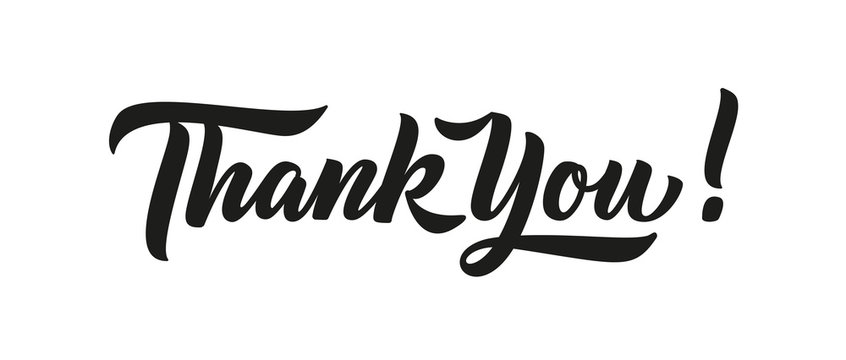